In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
from matplotlib import pyplot as plt
from itertools import cycle

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA, KernelPCA

In [2]:
DIR = Path('Tea Score Images - partition').resolve()
DATA_DIR = DIR / 'Feature data' / 'Color feature data'
CLASS_LABEL = ['Score 1', 'Score 2', 'Score 3', 'Score 4']
COLOR_MODE = ['RGB', 'HSV', 'LAB']

In [3]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
maxabs_scaler = MaxAbsScaler()
robust_scaler = RobustScaler()

encoder = LabelEncoder()

# RGB Space

In [4]:
data_frames = []

for label in CLASS_LABEL:
    rgb_dir = DATA_DIR / label / f'{label}_RGB'
    
    for file_path in rgb_dir.glob('*.csv'):
        df = pd.read_csv(file_path)
        df['class label'] = label
        data_frames.append(df)
    
all_data_frames = pd.concat(data_frames, ignore_index=True)
    
rgb_feature = all_data_frames.drop(columns=['class label']).values
rgb_label = all_data_frames['class label'].values
    
print(rgb_feature.shape)
print(rgb_label.shape)

(160, 12)
(160,)


## Standard Scaler

In [5]:
standard_scaled_rgb = standard_scaler.fit_transform(rgb_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(standard_scaled_rgb)
standard_rgb_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 54.02%
explained variance PC2: 33.72%
explained variance PC3: 8.17%
explained variance PC4: 2.48%
explained variance PC5: 1.04%
explained variance PC6: 0.41%
explained variance PC7: 0.10%
explained variance PC8: 0.03%
explained variance PC9: 0.02%
explained variance PC10: 0.01%
explained variance PC11: 0.01%
explained variance PC12: 0.00%


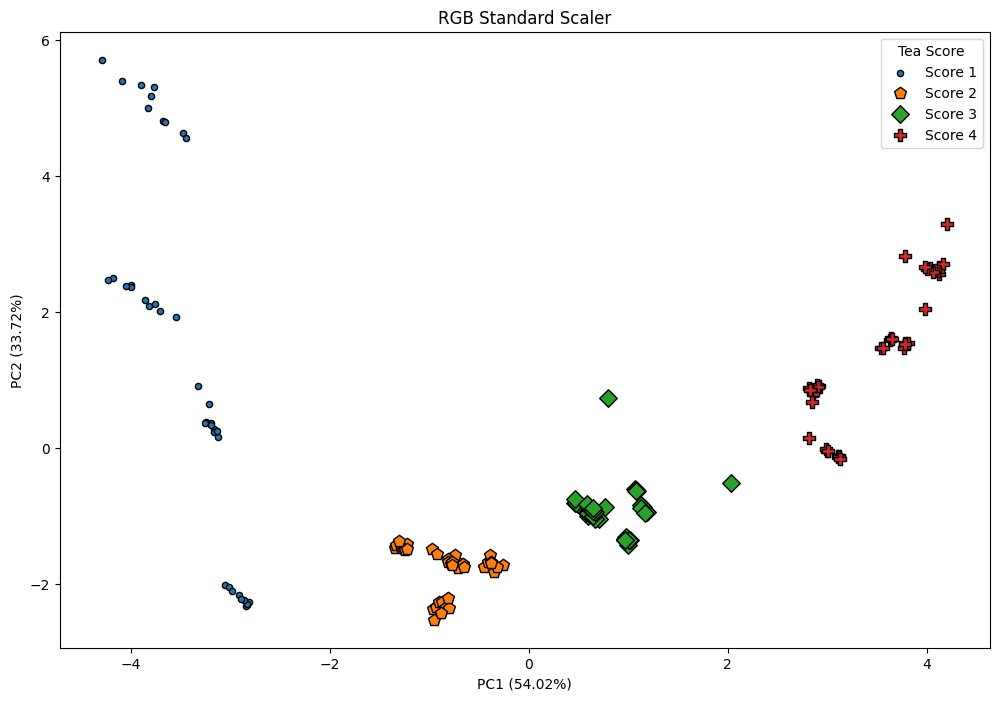

In [6]:
encoded_label_rgb = encoder.fit_transform(rgb_label)

standard_rgb_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = standard_rgb_pca_df[standard_rgb_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("RGB Standard Scaler")
plt.legend(title='Tea Score')
plt.show()

## MinMax Scaler

In [7]:
minmaxed_rgb = minmax_scaler.fit_transform(rgb_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(minmaxed_rgb)
minmax_rgb_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 61.76%
explained variance PC2: 29.02%
explained variance PC3: 6.03%
explained variance PC4: 1.87%
explained variance PC5: 0.83%
explained variance PC6: 0.35%
explained variance PC7: 0.08%
explained variance PC8: 0.02%
explained variance PC9: 0.02%
explained variance PC10: 0.01%
explained variance PC11: 0.01%
explained variance PC12: 0.00%


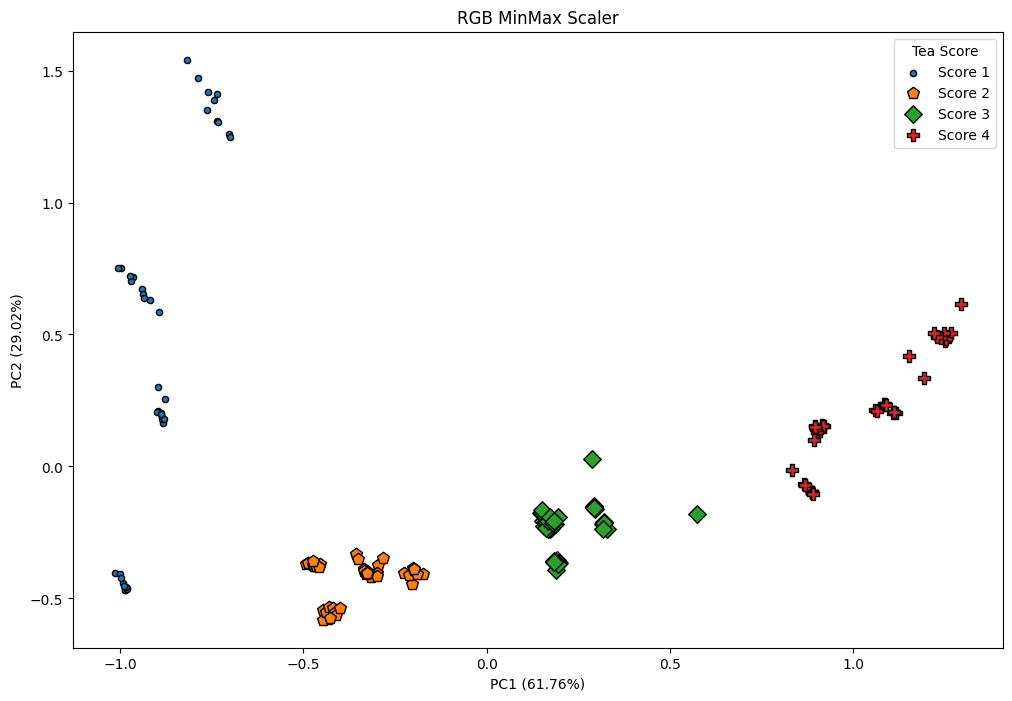

In [8]:
minmax_rgb_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = minmax_rgb_pca_df[minmax_rgb_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("RGB MinMax Scaler")
plt.legend(title='Tea Score')
plt.show()

## MaxAbs Scaler

In [9]:
maxed_rgb = maxabs_scaler.fit_transform(rgb_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(maxed_rgb)
maxabs_rgb_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 63.78%
explained variance PC2: 27.35%
explained variance PC3: 5.69%
explained variance PC4: 1.92%
explained variance PC5: 0.76%
explained variance PC6: 0.33%
explained variance PC7: 0.10%
explained variance PC8: 0.03%
explained variance PC9: 0.02%
explained variance PC10: 0.01%
explained variance PC11: 0.01%
explained variance PC12: 0.00%


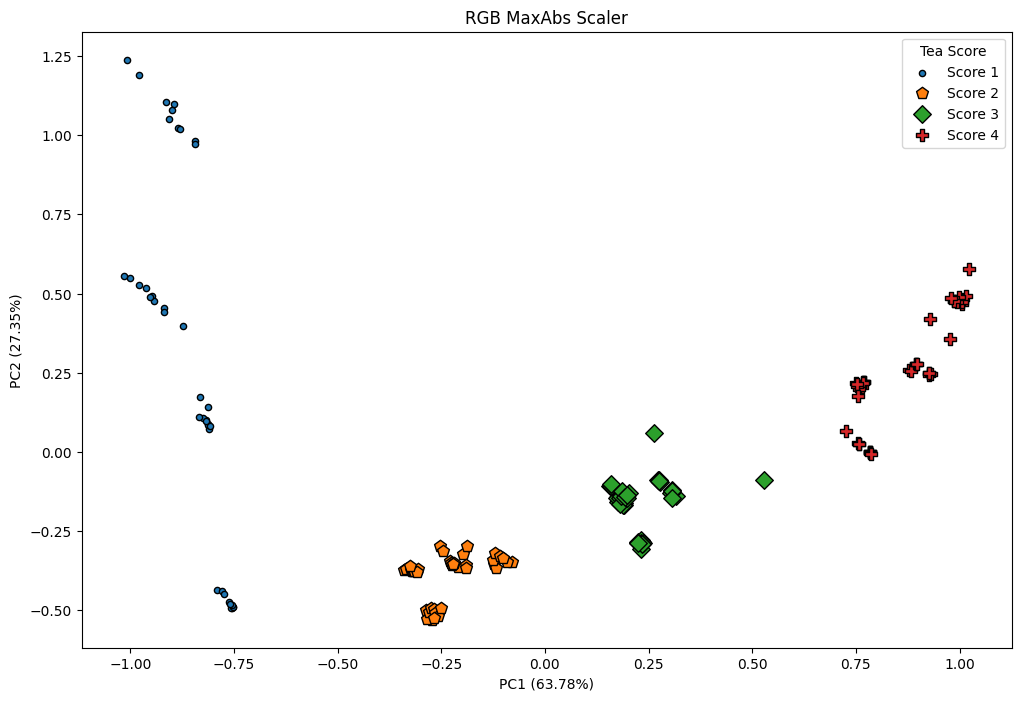

In [10]:
maxabs_rgb_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = maxabs_rgb_pca_df[maxabs_rgb_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("RGB MaxAbs Scaler")
plt.legend(title='Tea Score')
plt.show()

## Robust Scaler

In [11]:
robust_scaled_rgb = robust_scaler.fit_transform(rgb_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(robust_scaled_rgb)
robust_rgb_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 77.02%
explained variance PC2: 15.72%
explained variance PC3: 4.08%
explained variance PC4: 1.45%
explained variance PC5: 1.24%
explained variance PC6: 0.22%
explained variance PC7: 0.20%
explained variance PC8: 0.06%
explained variance PC9: 0.01%
explained variance PC10: 0.00%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


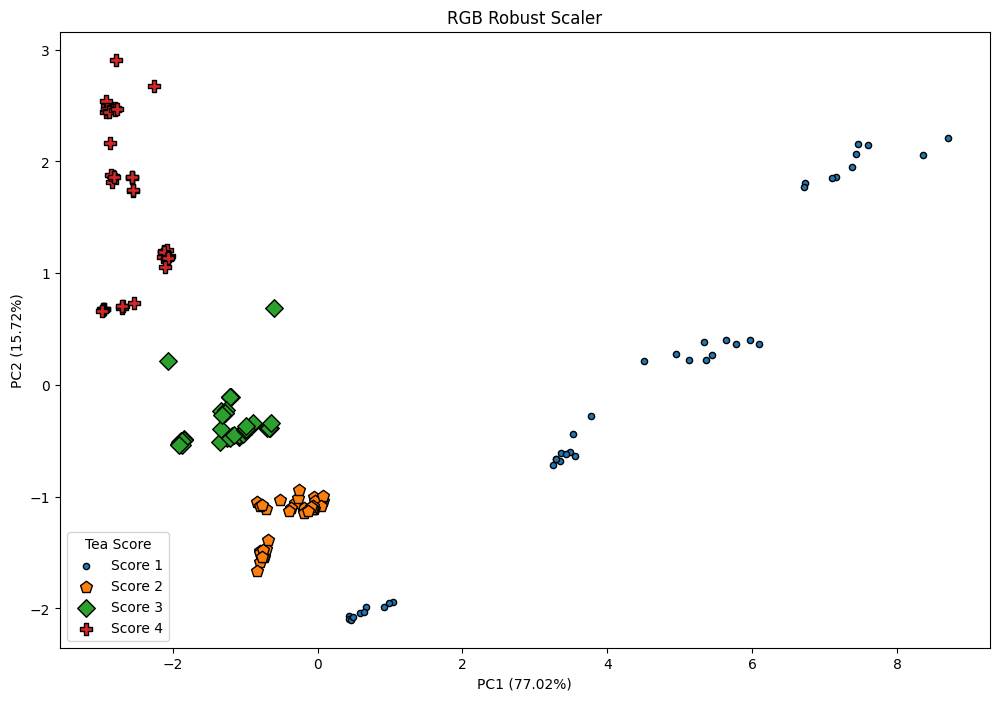

In [12]:
robust_rgb_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = robust_rgb_pca_df[robust_rgb_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("RGB Robust Scaler")
plt.legend(title='Tea Score')
plt.show()

# HSV Space

In [13]:
data_frames = []

for label in CLASS_LABEL:
    rgb_dir = DATA_DIR / label / f'{label}_HSV'
    
    for file_path in rgb_dir.glob('*.csv'):
        df = pd.read_csv(file_path)
        df['class label'] = label
        data_frames.append(df)
    
all_data_frames = pd.concat(data_frames, ignore_index=True)
    
hsv_feature = all_data_frames.drop(columns=['class label']).values
hsv_label = all_data_frames['class label'].values
    
print(hsv_feature.shape)
print(hsv_label.shape)

(160, 12)
(160,)


## Standard Scaler

In [14]:
standard_scaled_hsv = standard_scaler.fit_transform(hsv_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(standard_scaled_hsv)
standard_hsv_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 75.77%
explained variance PC2: 13.90%
explained variance PC3: 6.20%
explained variance PC4: 2.47%
explained variance PC5: 0.94%
explained variance PC6: 0.56%
explained variance PC7: 0.08%
explained variance PC8: 0.05%
explained variance PC9: 0.02%
explained variance PC10: 0.01%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


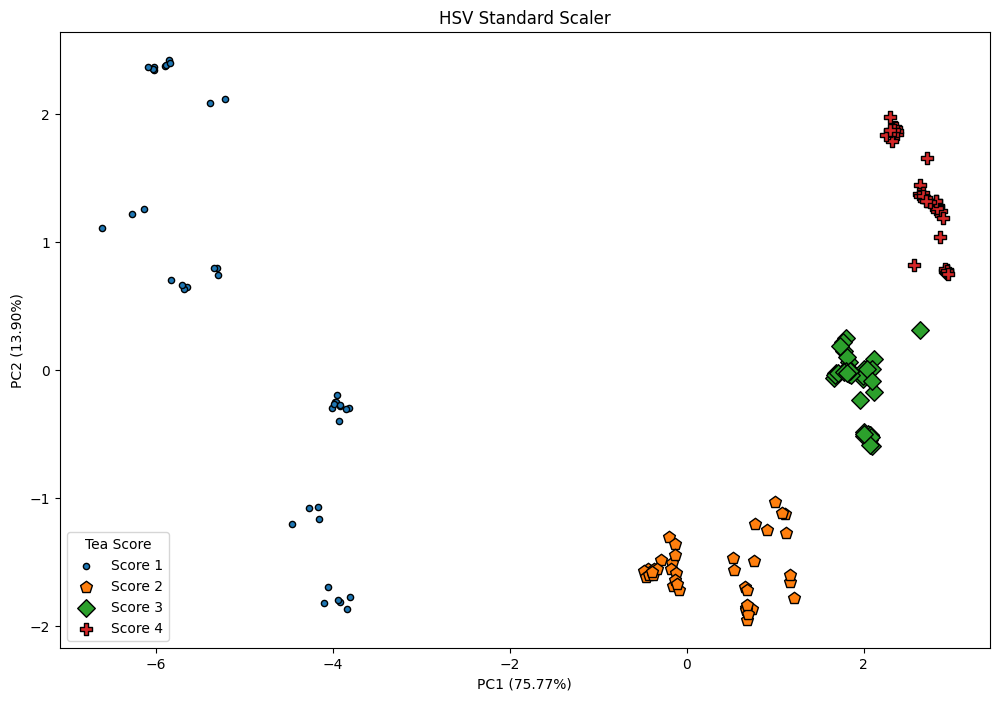

In [15]:
encoded_label_hsv = encoder.fit_transform(hsv_label)

standard_hsv_pca_df['encoded label'] = encoded_label_hsv
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = standard_hsv_pca_df[standard_hsv_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("HSV Standard Scaler")
plt.legend(title='Tea Score')
plt.show()

## MinMax Scaler

In [16]:
minmaxed_hsv = minmax_scaler.fit_transform(hsv_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(minmaxed_hsv)
minmax_hsv_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 78.35%
explained variance PC2: 13.81%
explained variance PC3: 4.60%
explained variance PC4: 1.64%
explained variance PC5: 0.95%
explained variance PC6: 0.49%
explained variance PC7: 0.07%
explained variance PC8: 0.07%
explained variance PC9: 0.01%
explained variance PC10: 0.01%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


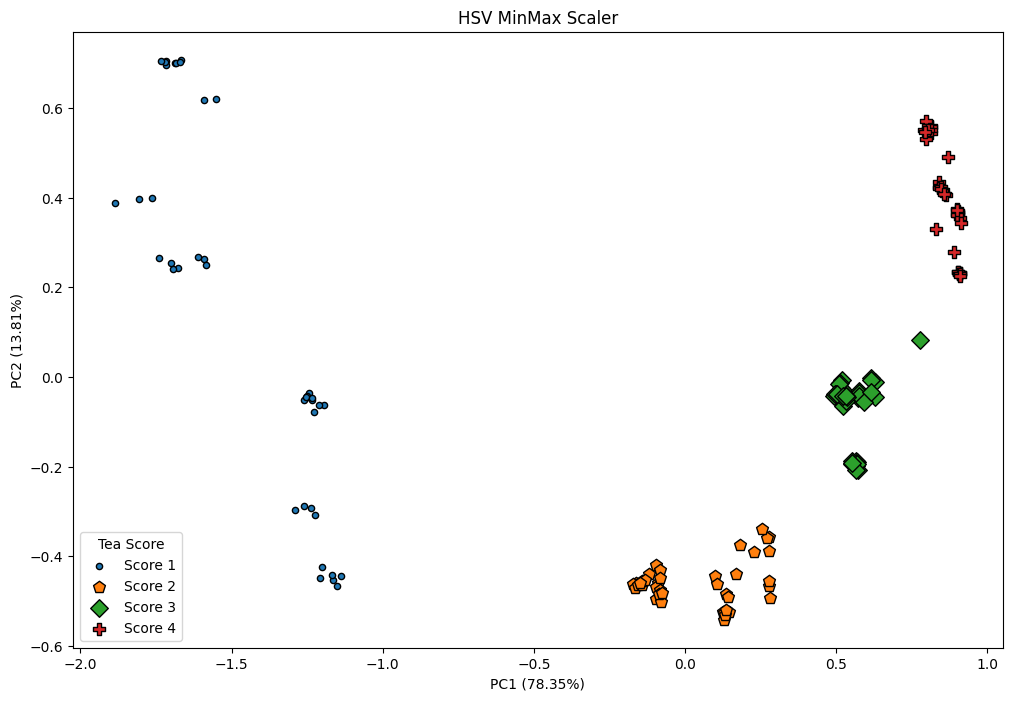

In [17]:
minmax_hsv_pca_df['encoded label'] = encoded_label_hsv
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = minmax_hsv_pca_df[minmax_hsv_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("HSV MinMax Scaler")
plt.legend(title='Tea Score')
plt.show()

## MaxAbs Scaler

In [18]:
maxed_hsv = maxabs_scaler.fit_transform(hsv_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(maxed_hsv)
maxabs_hsv_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 75.77%
explained variance PC2: 14.59%
explained variance PC3: 5.81%
explained variance PC4: 2.79%
explained variance PC5: 0.80%
explained variance PC6: 0.16%
explained variance PC7: 0.05%
explained variance PC8: 0.01%
explained variance PC9: 0.01%
explained variance PC10: 0.00%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


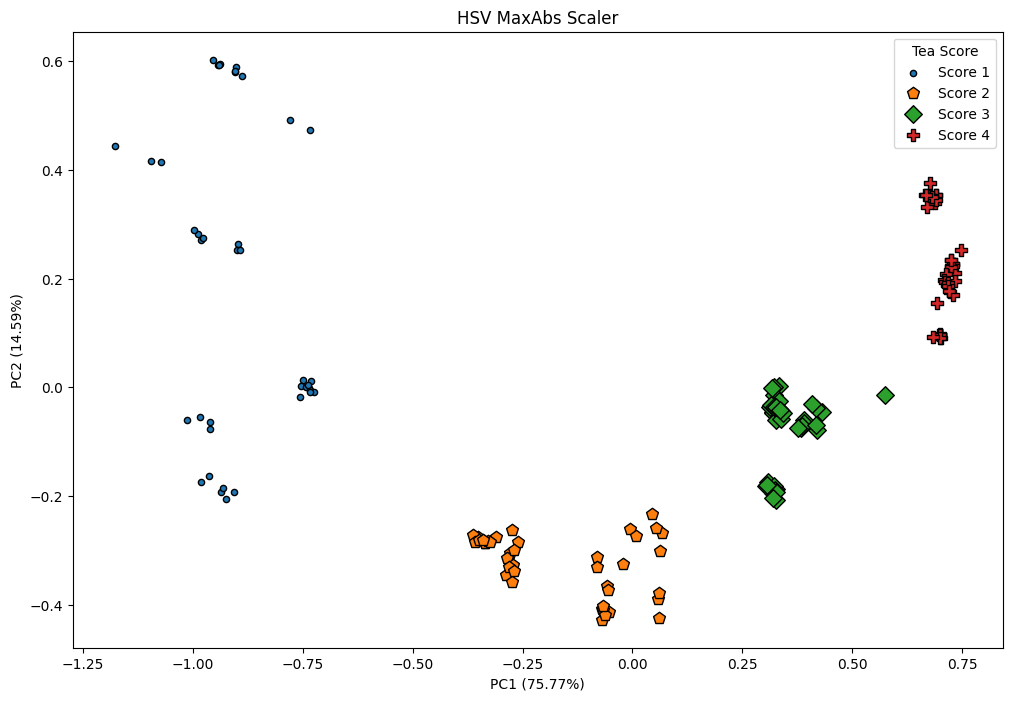

In [19]:
maxabs_hsv_pca_df['encoded label'] = encoded_label_hsv
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = maxabs_hsv_pca_df[maxabs_hsv_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("HSV MaxAbs Scaler")
plt.legend(title='Tea Score')
plt.show()

## Robust Scaler

In [20]:
robust_scaled_hsv = robust_scaler.fit_transform(hsv_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(robust_scaled_hsv)
robust_hsv_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 83.78%
explained variance PC2: 9.97%
explained variance PC3: 3.33%
explained variance PC4: 1.78%
explained variance PC5: 0.68%
explained variance PC6: 0.24%
explained variance PC7: 0.11%
explained variance PC8: 0.08%
explained variance PC9: 0.03%
explained variance PC10: 0.01%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


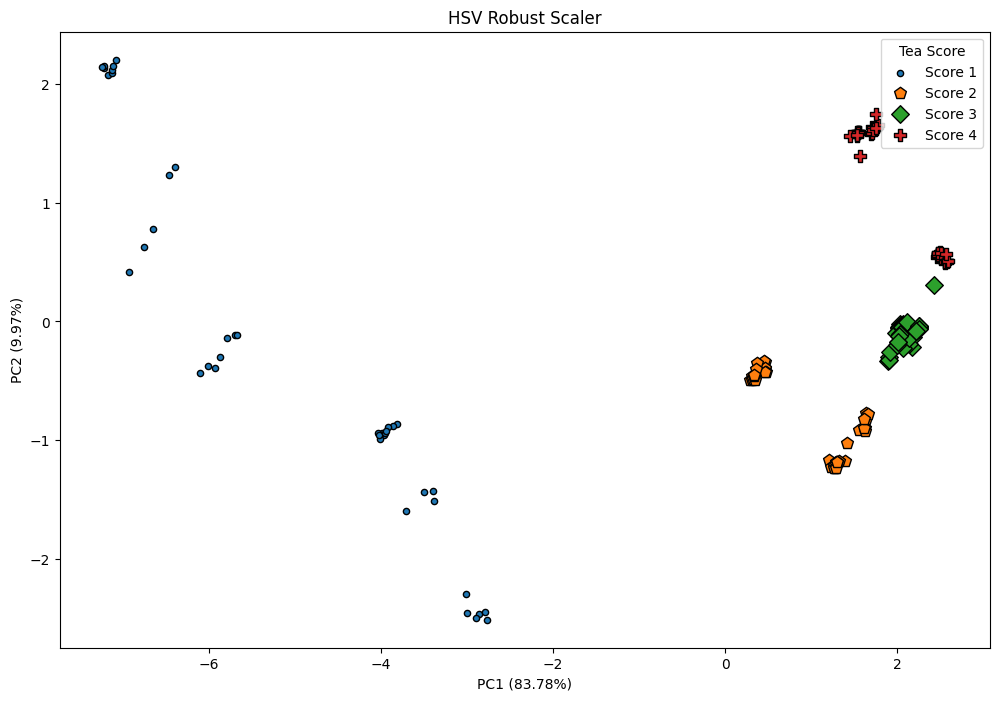

In [21]:
robust_hsv_pca_df['encoded label'] = encoded_label_hsv
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = robust_hsv_pca_df[robust_hsv_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("HSV Robust Scaler")
plt.legend(title='Tea Score')
plt.show()

# LAB Space

In [22]:
data_frames = []

for label in CLASS_LABEL:
    rgb_dir = DATA_DIR / label / f'{label}_LAB'
    
    for file_path in rgb_dir.glob('*.csv'):
        df = pd.read_csv(file_path)
        df['class label'] = label
        data_frames.append(df)
    
all_data_frames = pd.concat(data_frames, ignore_index=True)
    
lab_feature = all_data_frames.drop(columns=['class label']).values
lab_label = all_data_frames['class label'].values
    
print(lab_feature.shape)
print(lab_label.shape)

(160, 12)
(160,)


## Standard Scaler

In [23]:
standard_scaled_lab = standard_scaler.fit_transform(lab_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(standard_scaled_lab)
standard_lab_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 75.27%
explained variance PC2: 23.90%
explained variance PC3: 0.42%
explained variance PC4: 0.27%
explained variance PC5: 0.08%
explained variance PC6: 0.03%
explained variance PC7: 0.02%
explained variance PC8: 0.01%
explained variance PC9: 0.00%
explained variance PC10: 0.00%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


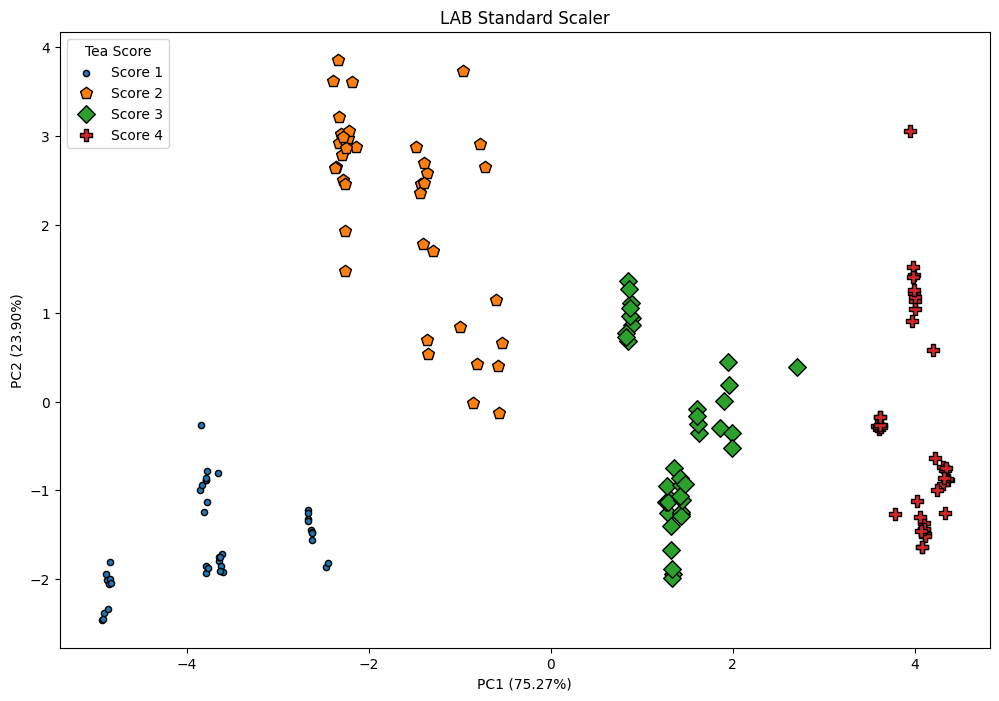

In [24]:
encoded_label_lab = encoder.fit_transform(lab_label)

standard_lab_pca_df['encoded label'] = encoded_label_lab
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = standard_lab_pca_df[standard_lab_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("LAB Standard Scaler")
plt.legend(title='Tea Score')
plt.show()

## MinMax Scaler

In [25]:
minmaxed_lab = minmax_scaler.fit_transform(lab_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(minmaxed_lab)
minmax_lab_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 82.79%
explained variance PC2: 16.50%
explained variance PC3: 0.38%
explained variance PC4: 0.19%
explained variance PC5: 0.07%
explained variance PC6: 0.03%
explained variance PC7: 0.02%
explained variance PC8: 0.01%
explained variance PC9: 0.00%
explained variance PC10: 0.00%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


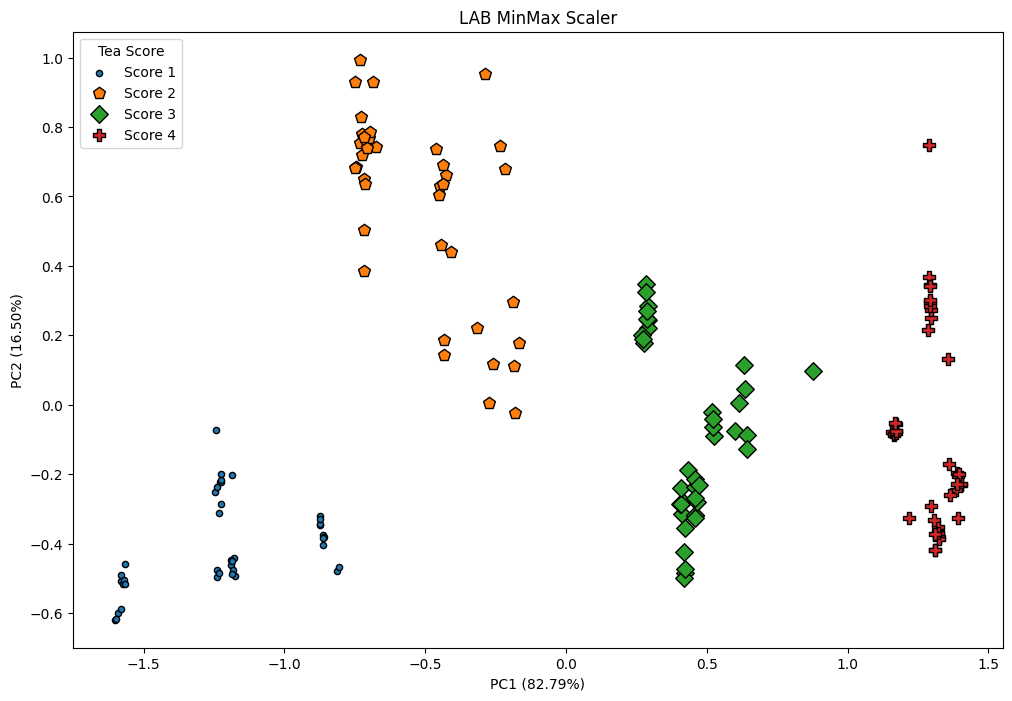

In [26]:
minmax_lab_pca_df['encoded label'] = encoded_label_lab
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = minmax_lab_pca_df[minmax_lab_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("LAB MinMax Scaler")
plt.legend(title='Tea Score')
plt.show()

## MaxAbs Scaler

In [27]:
maxed_lab = maxabs_scaler.fit_transform(lab_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(maxed_lab)
maxabs_lab_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 70.46%
explained variance PC2: 28.79%
explained variance PC3: 0.33%
explained variance PC4: 0.30%
explained variance PC5: 0.07%
explained variance PC6: 0.03%
explained variance PC7: 0.01%
explained variance PC8: 0.00%
explained variance PC9: 0.00%
explained variance PC10: 0.00%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


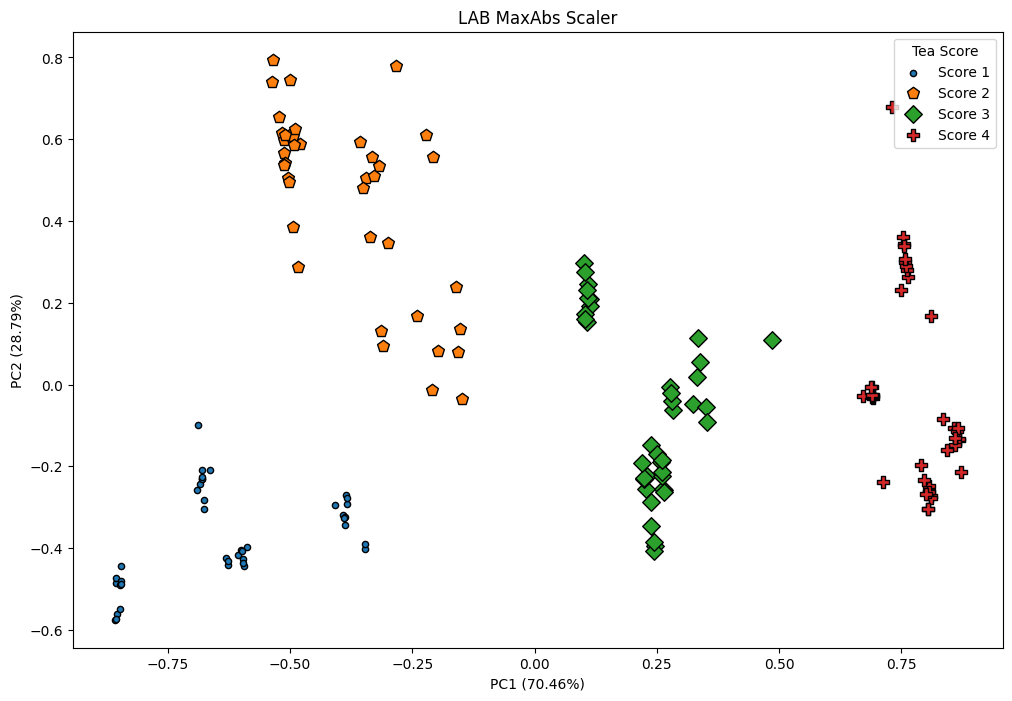

In [28]:
maxabs_lab_pca_df['encoded label'] = encoded_label_lab
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = maxabs_lab_pca_df[maxabs_lab_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("LAB MaxAbs Scaler")
plt.legend(title='Tea Score')
plt.show()

## Robust Scaler

In [29]:
robust_scaled_lab = robust_scaler.fit_transform(lab_feature)

pca = PCA(n_components=12)
principal_components = pca.fit_transform(robust_scaled_lab)
robust_lab_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 12):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 65.16%
explained variance PC2: 33.86%
explained variance PC3: 0.43%
explained variance PC4: 0.40%
explained variance PC5: 0.09%
explained variance PC6: 0.03%
explained variance PC7: 0.01%
explained variance PC8: 0.01%
explained variance PC9: 0.00%
explained variance PC10: 0.00%
explained variance PC11: 0.00%
explained variance PC12: 0.00%


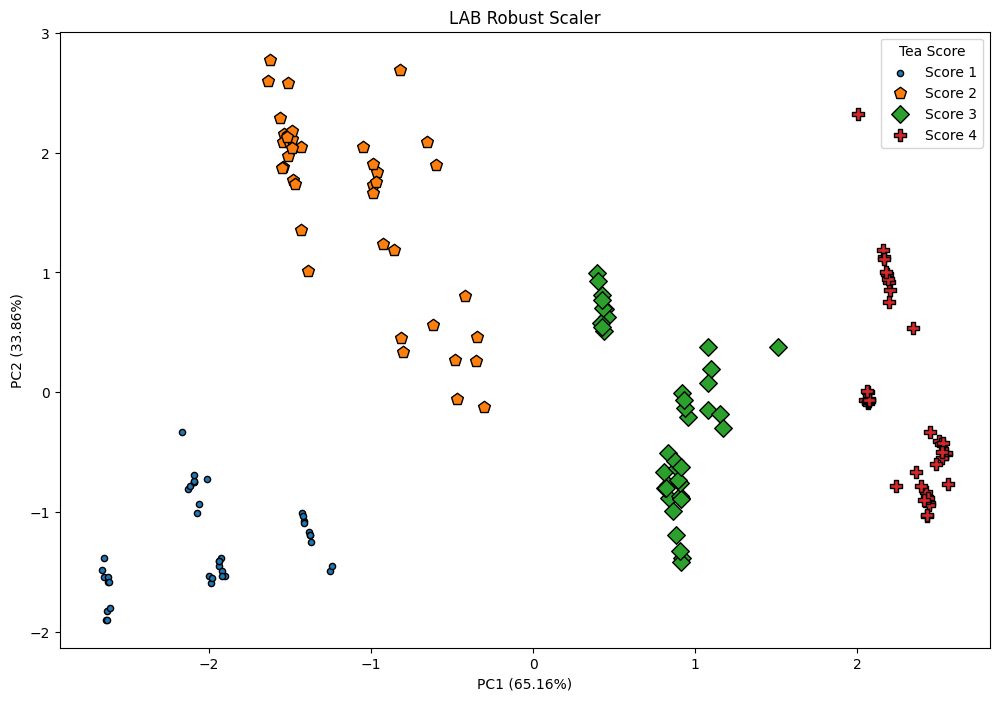

In [30]:
robust_lab_pca_df['encoded label'] = encoded_label_lab
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = robust_lab_pca_df[robust_lab_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("LAB Robust Scaler")
plt.legend(title='Tea Score')
plt.show()

# All Color Space

In [31]:
all_color_features = np.hstack([rgb_feature, hsv_feature, lab_feature])
all_color_df = pd.DataFrame(all_color_features)

print(all_color_df.shape)

(160, 36)


## Standard Scaler

In [32]:
standard_scaled_all = standard_scaler.fit_transform(all_color_df)

pca = PCA(n_components=36)
principal_components = pca.fit_transform(standard_scaled_all)

columns = []
for i in range(0, 36):
    elements = f'PC{i+1}'
    columns.append(elements)

standard_all_pca_df = pd.DataFrame(data=principal_components, columns=columns)
explained_variance = pca.explained_variance_ratio_
for i in range(0, 36):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 64.74%
explained variance PC2: 21.80%
explained variance PC3: 9.38%
explained variance PC4: 2.09%
explained variance PC5: 0.62%
explained variance PC6: 0.47%
explained variance PC7: 0.35%
explained variance PC8: 0.24%
explained variance PC9: 0.13%
explained variance PC10: 0.05%
explained variance PC11: 0.04%
explained variance PC12: 0.03%
explained variance PC13: 0.02%
explained variance PC14: 0.01%
explained variance PC15: 0.01%
explained variance PC16: 0.01%
explained variance PC17: 0.01%
explained variance PC18: 0.00%
explained variance PC19: 0.00%
explained variance PC20: 0.00%
explained variance PC21: 0.00%
explained variance PC22: 0.00%
explained variance PC23: 0.00%
explained variance PC24: 0.00%
explained variance PC25: 0.00%
explained variance PC26: 0.00%
explained variance PC27: 0.00%
explained variance PC28: 0.00%
explained variance PC29: 0.00%
explained variance PC30: 0.00%
explained variance PC31: 0.00%
explained variance PC32: 0.00%
explained varia

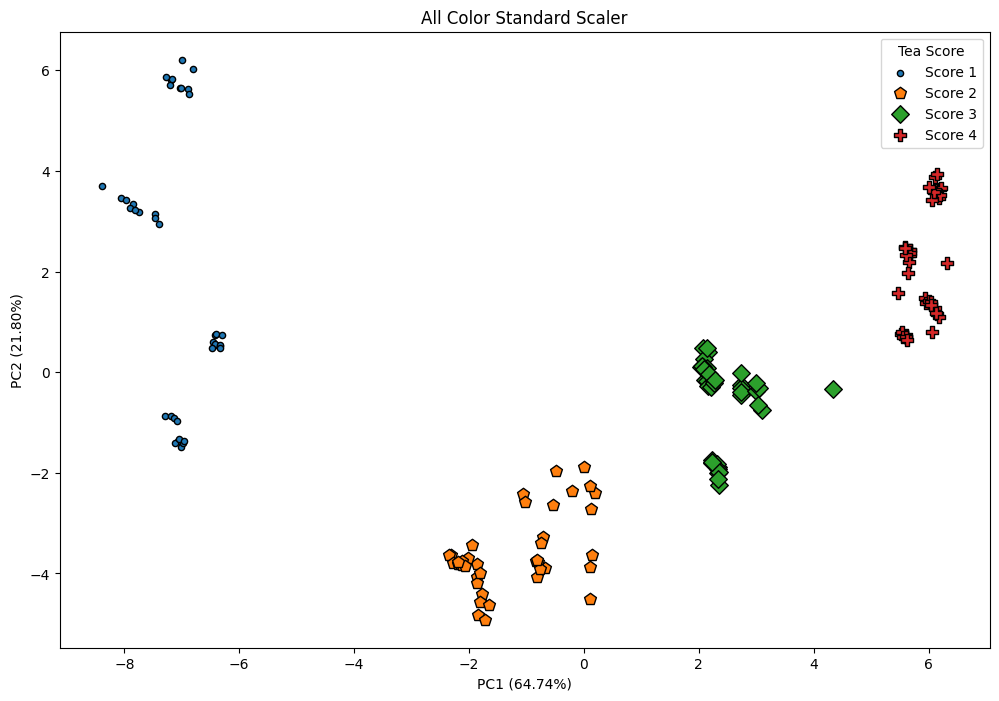

In [33]:
standard_all_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = standard_all_pca_df[standard_all_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("All Color Standard Scaler")
plt.legend(title='Tea Score')
plt.show()

## MinMax Scaler

In [34]:
minmaxed_all_color = minmax_scaler.fit_transform(all_color_df)

pca = PCA(n_components=36)
principal_components = pca.fit_transform(minmaxed_all_color)

columns = []
for i in range(0, 36):
    elements = f'PC{i+1}'
    columns.append(elements)

minmax_all_pca_df = pd.DataFrame(data=principal_components, columns=columns)
explained_variance = pca.explained_variance_ratio_
for i in range(0, 36):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 71.91%
explained variance PC2: 18.49%
explained variance PC3: 6.70%
explained variance PC4: 1.33%
explained variance PC5: 0.54%
explained variance PC6: 0.34%
explained variance PC7: 0.24%
explained variance PC8: 0.17%
explained variance PC9: 0.11%
explained variance PC10: 0.04%
explained variance PC11: 0.03%
explained variance PC12: 0.03%
explained variance PC13: 0.02%
explained variance PC14: 0.01%
explained variance PC15: 0.01%
explained variance PC16: 0.01%
explained variance PC17: 0.01%
explained variance PC18: 0.01%
explained variance PC19: 0.00%
explained variance PC20: 0.00%
explained variance PC21: 0.00%
explained variance PC22: 0.00%
explained variance PC23: 0.00%
explained variance PC24: 0.00%
explained variance PC25: 0.00%
explained variance PC26: 0.00%
explained variance PC27: 0.00%
explained variance PC28: 0.00%
explained variance PC29: 0.00%
explained variance PC30: 0.00%
explained variance PC31: 0.00%
explained variance PC32: 0.00%
explained varia

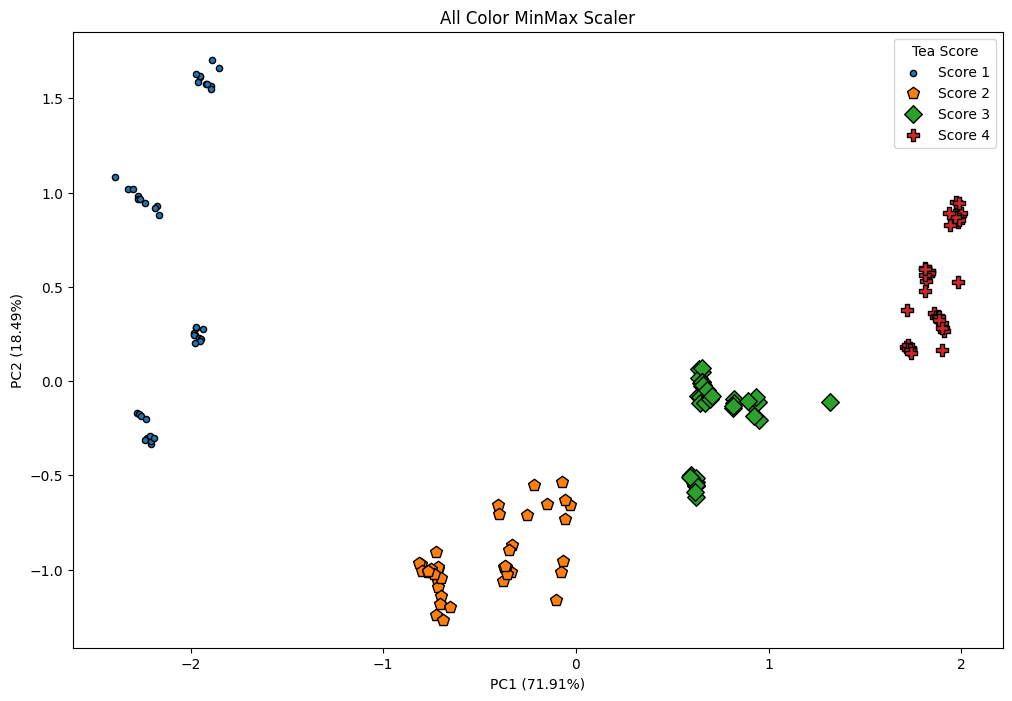

In [35]:
minmax_all_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = minmax_all_pca_df[minmax_all_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("All Color MinMax Scaler")
plt.legend(title='Tea Score')
plt.show()

## MaxAbs Scaler

In [36]:
maxed_all_color = maxabs_scaler.fit_transform(all_color_df)

pca = PCA(n_components=36)
principal_components = pca.fit_transform(maxed_all_color)

columns = []
for i in range(0, 36):
    elements = f'PC{i+1}'
    columns.append(elements)

maxabs_all_pca_df = pd.DataFrame(data=principal_components, columns=columns)
explained_variance = pca.explained_variance_ratio_
for i in range(0, 36):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 67.76%
explained variance PC2: 20.13%
explained variance PC3: 8.46%
explained variance PC4: 2.04%
explained variance PC5: 0.54%
explained variance PC6: 0.38%
explained variance PC7: 0.27%
explained variance PC8: 0.14%
explained variance PC9: 0.12%
explained variance PC10: 0.04%
explained variance PC11: 0.04%
explained variance PC12: 0.03%
explained variance PC13: 0.02%
explained variance PC14: 0.01%
explained variance PC15: 0.01%
explained variance PC16: 0.01%
explained variance PC17: 0.01%
explained variance PC18: 0.00%
explained variance PC19: 0.00%
explained variance PC20: 0.00%
explained variance PC21: 0.00%
explained variance PC22: 0.00%
explained variance PC23: 0.00%
explained variance PC24: 0.00%
explained variance PC25: 0.00%
explained variance PC26: 0.00%
explained variance PC27: 0.00%
explained variance PC28: 0.00%
explained variance PC29: 0.00%
explained variance PC30: 0.00%
explained variance PC31: 0.00%
explained variance PC32: 0.00%
explained varia

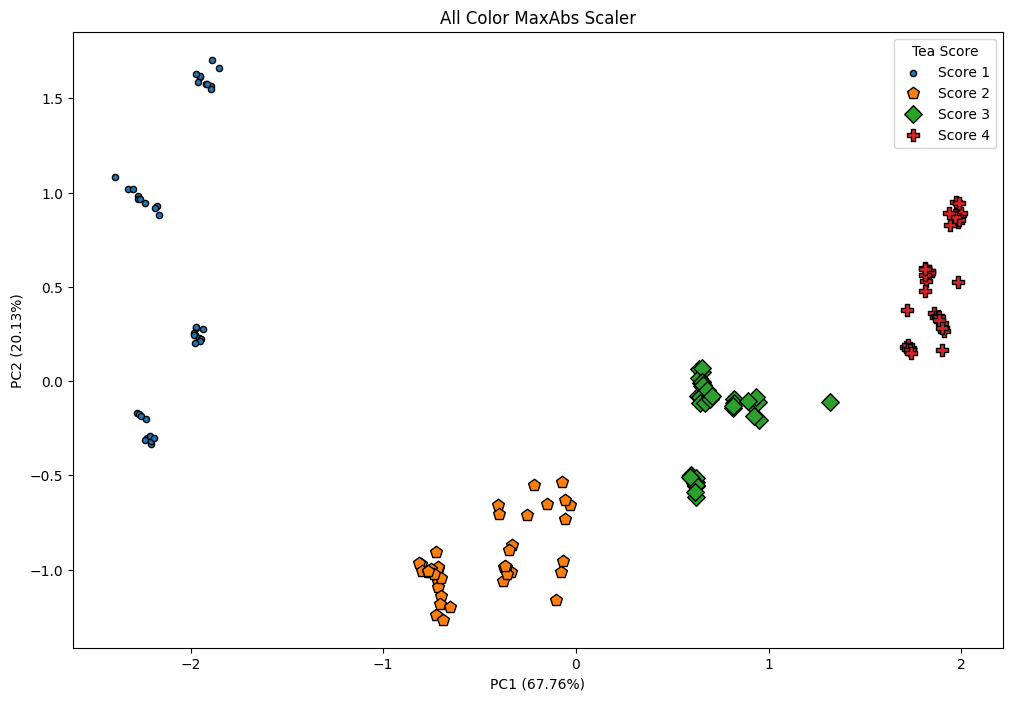

In [37]:
minmax_all_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = minmax_all_pca_df[minmax_all_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("All Color MaxAbs Scaler")
plt.legend(title='Tea Score')
plt.show()

## Robust Scaler

In [38]:
robust_scaled_all_color = robust_scaler.fit_transform(all_color_df)

pca = PCA(n_components=36)
principal_components = pca.fit_transform(robust_scaled_all_color)

columns = []
for i in range(0, 36):
    elements = f'PC{i+1}'
    columns.append(elements)

robust_all_pca_df = pd.DataFrame(data=principal_components, columns=columns)
explained_variance = pca.explained_variance_ratio_
for i in range(0, 36):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 72.13%
explained variance PC2: 15.55%
explained variance PC3: 6.86%
explained variance PC4: 3.00%
explained variance PC5: 0.98%
explained variance PC6: 0.59%
explained variance PC7: 0.29%
explained variance PC8: 0.25%
explained variance PC9: 0.08%
explained variance PC10: 0.06%
explained variance PC11: 0.05%
explained variance PC12: 0.04%
explained variance PC13: 0.04%
explained variance PC14: 0.02%
explained variance PC15: 0.01%
explained variance PC16: 0.01%
explained variance PC17: 0.00%
explained variance PC18: 0.00%
explained variance PC19: 0.00%
explained variance PC20: 0.00%
explained variance PC21: 0.00%
explained variance PC22: 0.00%
explained variance PC23: 0.00%
explained variance PC24: 0.00%
explained variance PC25: 0.00%
explained variance PC26: 0.00%
explained variance PC27: 0.00%
explained variance PC28: 0.00%
explained variance PC29: 0.00%
explained variance PC30: 0.00%
explained variance PC31: 0.00%
explained variance PC32: 0.00%
explained varia

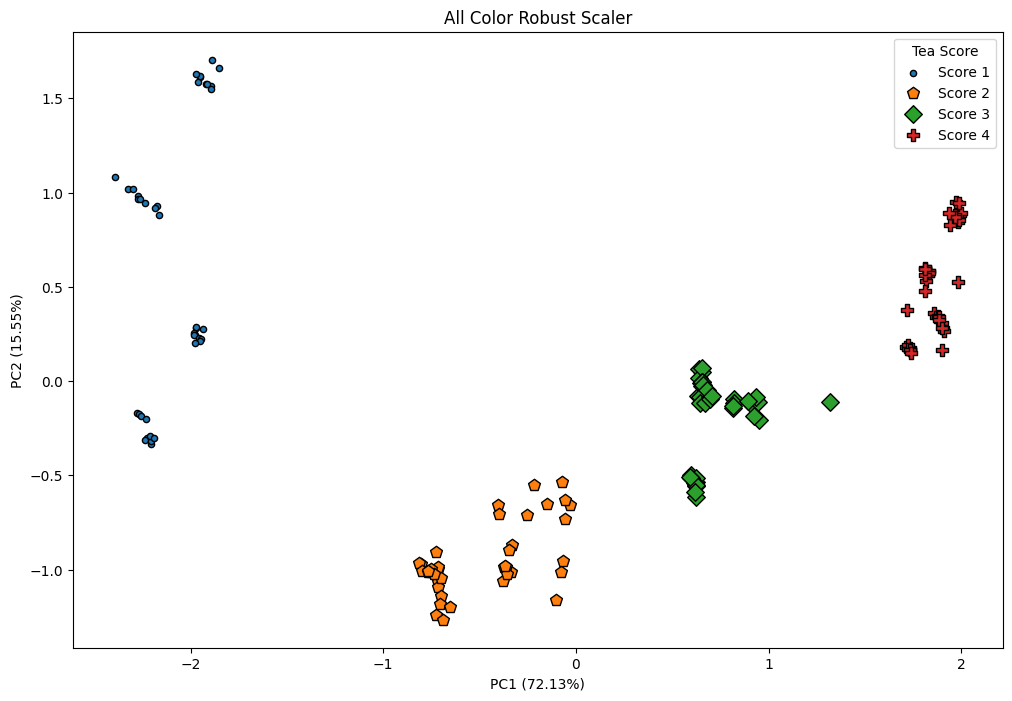

In [39]:
minmax_all_pca_df['encoded label'] = encoded_label_rgb
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = minmax_all_pca_df[minmax_all_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("All Color Robust Scaler")
plt.legend(title='Tea Score')
plt.show()